In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, homogeneity_score, completeness_score, plot_confusion_matrix
from sklearn import linear_model, svm
from sklearn.metrics import r2_score

In [2]:
train_data = pd.read_csv('CS98XRegressionTrain.csv')
train_data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [3]:
rows, columns = train_data.shape
print('Our dataset has {} rows and {} columns'.format(rows, columns))

Our dataset has 453 rows and 15 columns


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


In [5]:
train_data.describe()

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [6]:
print('Checking if we have any null values in our dataset -')
train_data[:].isna().any()

Checking if we have any null values in our dataset -


Id           False
title        False
artist       False
top genre     True
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [7]:
train_data.isnull().sum()

Id            0
title         0
artist        0
top genre    15
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [8]:
train_data = train_data.dropna() 

In [9]:
uniqueValues = (train_data['top genre']).unique()
len(uniqueValues)

86

In [10]:
sum(train_data['pop'])/len(train_data['pop'])

61.55707762557078

In [11]:
textual_data = ['top genre']

for col in textual_data:
    print(col, ": ", train_data[col].unique(), "\n")

top genre :  ['adult standards' 'glam rock' 'pop' 'album rock' 'boy band'
 'brill building pop' 'rock-and-roll' 'country rock' 'canadian pop'
 'dance pop' 'europop' 'bebop' 'art rock' 'disco' 'blues' 'barbadian pop'
 'deep adult standards' 'deep house' 'atl hip hop' 'dance rock'
 'disco house' 'bubblegum dance' 'classic soul' 'classic uk pop'
 'east coast hip hop' 'doo-wop' 'britpop' 'british blues' 'soft rock'
 'australian talent show' 'art pop' 'british soul' 'british invasion'
 'belgian pop' 'big room' 'german dance' 'italian pop' 'british folk'
 'brit funk' 'chicago soul' 'neo mellow' 'british comedy' 'hip hop'
 'new wave pop' 'eurodance' 'detroit hip hop' 'classic rock' 'uk garage'
 'afrobeat' 'r&b' 'chicago rap' 'classic danish pop' 'british dance band'
 'drone folk' 'permanent wave' 'merseybeat' 'g funk' 'blues rock'
 'celtic rock' 'bow pop' 'australian rock' 'boogaloo' 'alternative metal'
 'belgian dance' 'glam metal' 'latin' 'baroque pop' 'bubble trance'
 'canadian folk' 'amer

In [12]:
train_data['top genre'].value_counts()

adult standards       68
album rock            66
dance pop             61
brill building pop    16
glam rock             16
                      ..
bow pop                1
australian rock        1
boogaloo               1
british comedy         1
alternative rock       1
Name: top genre, Length: 86, dtype: int64

In [13]:
train_data['artist'].value_counts()

Elton John     9
Queen          7
ABBA           7
The Beatles    6
Rihanna        5
              ..
Paul Young     1
Keri Hilson    1
Four Tops      1
La Bouche      1
*NSYNC         1
Name: artist, Length: 331, dtype: int64

In [14]:
encoder = LabelEncoder()
for col in textual_data:
    train_data[col] = encoder.fit_transform(train_data[col])
train_data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,1,1996,107,31,45,-8,13,28,150,75,3,44
2,3,How Deep Is Your Love,Bee Gees,1,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,1,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,68,1973,121,47,56,-8,15,40,193,45,3,63
5,6,Grenade,Bruno Mars,80,2010,110,56,71,-7,12,23,223,15,6,74


In [15]:
train_data = train_data.drop(['Id', 'title', 'artist', 'year'], axis=1)
train_data.head()

,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,107,31,45,-8,13,28,150,75,3,44
2,1,105,36,63,-9,13,67,245,11,3,77
3,1,170,28,47,-16,13,33,232,25,3,67
4,68,121,47,56,-8,15,40,193,45,3,63
5,80,110,56,71,-7,12,23,223,15,6,74


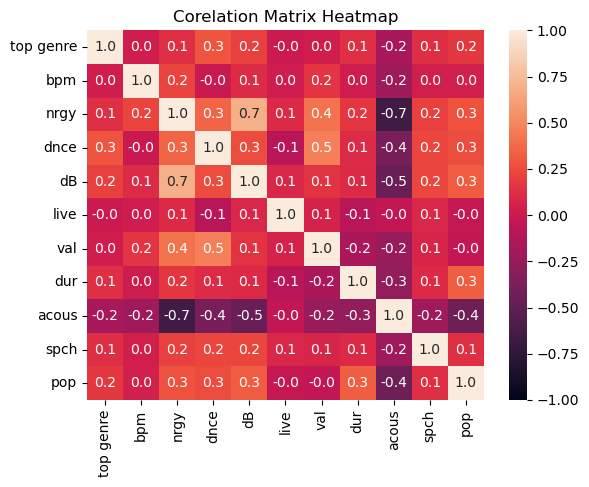

In [16]:
corr_matrix = train_data.corr()
ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, fmt='.1f')
plt.title('Corelation Matrix Heatmap')
#plt.savefig('Corelation_matrix.jpg')
plt.show()

# Training The Model

In [17]:
y = train_data['pop']

In [18]:
X = train_data.drop(['pop'], axis = 1)

In [19]:
X

,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,1,107,31,45,-8,13,28,150,75,3
2,1,105,36,63,-9,13,67,245,11,3
3,1,170,28,47,-16,13,33,232,25,3
4,68,121,47,56,-8,15,40,193,45,3
5,80,110,56,71,-7,12,23,223,15,6
...,...,...,...,...,...,...,...,...,...,...
448,1,80,22,18,-17,10,16,214,92,4
449,25,148,81,53,-13,23,96,147,50,3
450,51,168,55,73,-8,20,61,289,23,14
451,24,165,87,64,-5,6,88,191,5,8


In [20]:
y

0      44
2      77
3      67
4      63
5      74
       ..
448    45
449    50
450    77
451    62
452    59
Name: pop, Length: 438, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
print('Number of record in X_train: ',len(X_train))
print('Number of record in X_test: ',len(X_test))
print('Number of record in y_train: ',len(y_train))
print('Number of record in y_test: ',len(y_test))

Number of record in X_train:  306
Number of record in X_test:  132
Number of record in y_train:  306
Number of record in y_test:  132


In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [24]:
reg_1 = linear_model.LinearRegression()
reg_1.fit(X_train, y_train)

LinearRegression()

In [25]:
m1score = reg_1.score(X_test, y_test)
print('Our model performs with the accuracy of :', m1score*100, '%')

Our model performs with the accuracy of : 20.535647768948905 %


In [26]:
predicted = reg_1.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(y_test,predicted))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predicted))

Root mean square error: 11.388124922515695
Mean absolute error: 9.406455336779057
Mean absolute percentage error 0.16662777727739683


In [27]:
reg_2 = linear_model.Lasso(alpha=0.1)
reg_2.fit(X_train, y_train)

Lasso(alpha=0.1)

In [28]:
m2score = reg_2.score(X_test, y_test)
print('Our model performs with the accuracy of :', m2score*100, '%')

Our model performs with the accuracy of : 20.504866746797113 %


In [29]:
predicted = reg_2.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(y_test,predicted))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predicted))

Root mean square error: 11.39033034026873
Mean absolute error: 9.405873622833441
Mean absolute percentage error 0.166627433524848


In [30]:
reg_3 = linear_model.LassoLars(alpha=.1, normalize=False)
reg_3.fit(X_train, y_train)

LassoLars(alpha=0.1, normalize=False)

In [31]:
m3score = reg_3.score(X_test, y_test)
print('Our model performs with the accuracy of :', m3score*100, '%')

Our model performs with the accuracy of : 20.504905833656284 %


In [32]:
predicted = reg_3.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(y_test,predicted))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predicted))

Root mean square error: 11.390327540019994
Mean absolute error: 9.405870372454656
Mean absolute percentage error 0.16662740457969738


In [33]:
reg_4 = svm.SVR()
reg_4.fit(X_train, y_train)

SVR()

In [34]:
m4score = reg_4.score(X_test, y_test)
print('Our model performs with the accuracy of :', m4score*100, '%')

Our model performs with the accuracy of : 20.32814251463203 %


In [35]:
predicted = reg_4.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(y_test,predicted))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predicted))

Root mean square error: 11.402984133060682
Mean absolute error: 9.5083879308457
Mean absolute percentage error 0.17784168780273635


In [36]:
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

In [37]:
reg_5 = SGDRegressor()
reg_5.fit(X_train, y_train)

SGDRegressor()

In [38]:
m5score = reg_5.score(X_test, y_test)
print('Our model performs with the accuracy of :', m5score*100, '%')

Our model performs with the accuracy of : -2.786376187540674e+27 %


In [39]:
predicted = reg_5.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(y_test,predicted))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predicted))

Root mean square error: 67435087249662.266
Mean absolute error: 65938850757297.64
Mean absolute percentage error 1108831761893.5312


In [40]:
reg_6 = RandomForestRegressor(max_depth=100, random_state=0)
reg_6.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, random_state=0)

In [41]:
m6score = reg_6.score(X_test, y_test)
print('Our model performs with the accuracy of :', m6score*100, '%')

Our model performs with the accuracy of : 24.07695283040433 %


In [42]:
predicted = reg_6.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)

predicted_train = reg_6.predict(X_train)
mse_train = mean_squared_error(y_train,predicted_train)
rmse_train = np.sqrt(mse_train)
r2 = r2_score(y_test, predicted)

print("R2 score :", r2)
print("Root mean square error:",rmse)
print("Root mean square error Train:",rmse_train)
print("Mean absolute error:",mean_absolute_error(y_test,predicted))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predicted))

R2 score : 0.2407695283040433
Root mean square error: 11.131478808071524
Root mean square error Train: 3.9380694317994447
Mean absolute error: 9.10871212121212
Mean absolute percentage error 0.1603879501518979


In [43]:
reg_7 = GradientBoostingRegressor(max_depth=10, random_state=0)
reg_7.fit(X, y)

GradientBoostingRegressor(max_depth=10, random_state=0)

In [44]:
m7score = reg_7.score(X_test, y_test)
print('Our model performs with the accuracy of :', m7score*100, '%')

Our model performs with the accuracy of : 99.99985959738999 %


In [45]:
predicted = reg_7.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)

predicted_train = reg_7.predict(X_train)
mse_train = mean_squared_error(y_train,predicted_train)
rmse_train = np.sqrt(mse_train)
r2 = r2_score(y_test, predicted)

print("R2 score :", r2)
print("Root mean square error:",rmse)
print("Root mean square error Train:",rmse_train)

print("Mean absolute error:",mean_absolute_error(y_test,predicted))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predicted))

R2 score : 0.9999985959738998
Root mean square error: 0.015137481987078955
Root mean square error Train: 0.014948421837133222
Mean absolute error: 0.01107638110170072
Mean absolute percentage error 0.00018641616376569926


In [46]:
reg_8 = HistGradientBoostingRegressor()
reg_8.fit(X, y)

HistGradientBoostingRegressor()

In [47]:
m8score = reg_8.score(X_test, y_test)
print('Our model performs with the accuracy of :', m8score*100, '%')

Our model performs with the accuracy of : 90.3194142718769 %


In [48]:
predicted = reg_8.predict(X_test)
mse = mean_squared_error(y_test,predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

print("R2 score :", r2)

print("Root mean square error:",rmse)
print("Mean absolute error:",mean_absolute_error(y_test,predicted))
print("Mean absolute percentage error", mean_absolute_percentage_error(y_test,predicted))

R2 score : 0.903194142718769
Root mean square error: 3.9748145087575093
Mean absolute error: 2.978303972645988
Mean absolute percentage error 0.053661067826740516


# Testing the Data

In [49]:
test_data = pd.read_csv('CS98XRegressionTest.csv')
test_data.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,454,Pump It,The Black Eyed Peas,dance pop,2005,154,93,65,-3,75,74,213,1,18
1,455,"Circle of Life - From ""The Lion King""/Soundtra...",Elton John,glam rock,1994,161,39,30,-15,11,14,292,26,3
2,456,We Are The Champions - Remastered 2011,Queen,glam rock,1977,64,46,27,-7,12,18,179,38,3
3,457,Insomnia - Radio Edit,Faithless,big beat,2010,127,92,71,-9,37,53,216,6,4
4,458,This Eve of Parting,John Hartford,appalachian folk,2018,115,46,56,-12,21,34,153,18,3


In [50]:
Id_col = test_data['Id']

In [51]:
test_data.drop(['Id', 'title', 'artist', 'year'], axis = 1, inplace=True)

In [52]:
test_data

,top genre,nrgy,dnce,dB,dur,spch
0,dance pop,93,65,-3,213,18
1,glam rock,39,30,-15,292,3
2,glam rock,46,27,-7,179,3
3,big beat,92,71,-9,216,4
4,appalachian folk,46,56,-12,153,3
...,...,...,...,...,...,...
109,east coast hip hop,57,61,-8,209,47
110,bubblegum dance,89,67,-6,215,3
111,east coast hip hop,58,78,-7,253,27
112,disco,97,72,-5,287,14


In [53]:

textual_data = ['top genre']

for col in textual_data:
    print(col, ": ", test_data[col].unique(), "\n")


top genre :  ['dance pop' 'glam rock' 'big beat' 'appalachian folk' 'adult standards'
 'mellow gold' 'album rock' 'brill building pop' 'barbadian pop'
 'british invasion' 'bubblegum dance' 'hollywood' 'cowboy western'
 'hip hop' 'g funk' 'eurodance' 'native american' 'alternative country'
 'east coast hip hop' 'art rock' 'blues rock' 'dance rock'
 'classic country pop' 'beach music' 'neo mellow' 'disco' nan 'europop'
 'classic rock' 'bronx hip hop' 'alternative metal' 'big room'
 'modern rock' 'dirty south rap' 'canadian pop' 'boy band'
 'deep adult standards' 'diva house' 'jazz fusion' 'glam metal'] 



In [54]:

encoder = LabelEncoder()
for col in textual_data:
    test_data[col] = encoder.fit_transform(test_data[col])
test_data.head()


,top genre,nrgy,dnce,dB,dur,spch
0,20,93,65,-3,213,18
1,31,39,30,-15,292,3
2,31,46,27,-7,179,3
3,8,92,71,-9,216,4
4,4,46,56,-12,153,3


In [55]:
results = reg_7.predict(test_data)

C:\Users\Echo\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- acous
- bpm
- live
- val

  warnings.warn(message, FutureWarning)


ValueError: X has 6 features, but GradientBoostingRegressor is expecting 10 features as input.

In [ ]:
test_data['Id'] = Id_col

In [ ]:
test_data['pop'] = results

In [ ]:
test_data

In [ ]:
submission_data = test_data.drop([ 'top genre','nrgy', 'dnce', 'dB', 'dur', 'spch'], axis = 1)

In [ ]:
submission_data

In [ ]:
for i in range(submission_data.shape[0]):
    submission_data['pop'][i] = round(submission_data['pop'][i], 0).astype(int) 

In [ ]:
submission_data

In [ ]:
submission_data.set_index('Id')

In [ ]:
submission_data.to_csv("regression_submission.csv")